In [12]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import didactic_datamining as ddm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
dataset = ddm.create_dataset(npoints=10, minvalue=0, maxvalue=10)
ddm.print_dataset(dataset)

P0 [9 5]
P1 [8 8]
P2 [1 8]
P3 [2 6]
P4 [1 0]
P5 [4 9]
P6 [1 3]
P7 [4 0]
P8 [8 4]
P9 [3 9]


In [38]:
import numpy as np

In [36]:
dataset

array([[9, 5],
       [8, 8],
       [1, 8],
       [2, 6],
       [1, 0],
       [4, 9],
       [1, 3],
       [4, 0],
       [8, 4],
       [3, 9]])

In [68]:
dataset = np.array([
    #[2,2],
#[3,2],
#[3,3],
#[4,4],
#[2,5],
    [4,2],
[10,5],
[6,2],
[7,1],
[7,3],
[8,1],
[7,5],
[8,6],
[8,5]
])

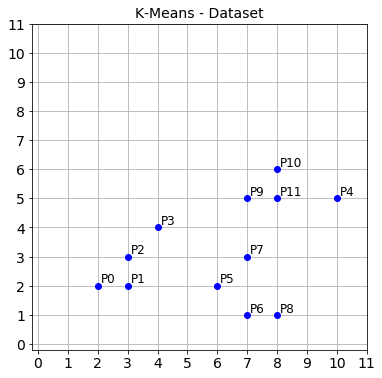

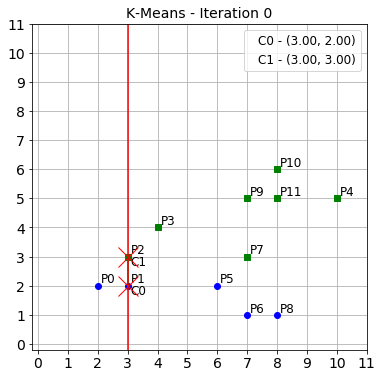

C0 (3.00, 2.00)
C1 (3.00, 3.00)


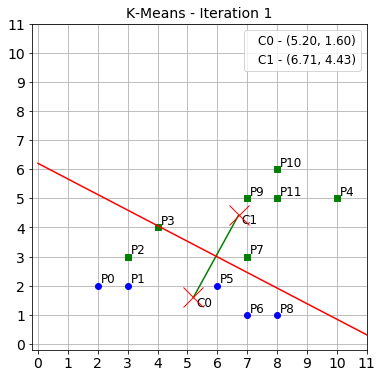

C0 (5.20, 1.60)
C1 (6.71, 4.43)


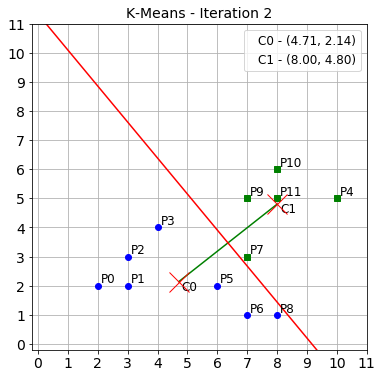

C0 (4.71, 2.14)
C1 (8.00, 4.80)


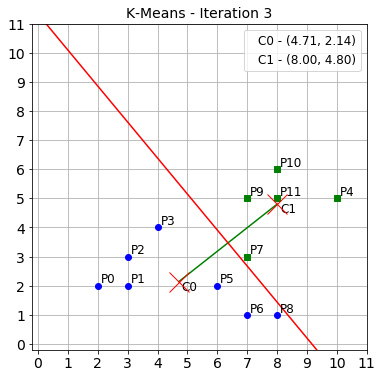

C0 (4.71, 2.14)
C1 (8.00, 4.80)


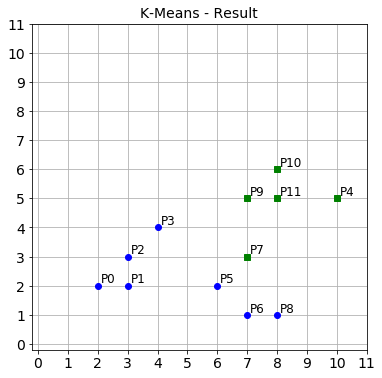

In [60]:
kmeans = ddm.DidatticKMeans(K=2, centroid_indexs=(1, 2), dist=ddm.euclidean_distance)
kmeans.fit(dataset, step_by_step=False)

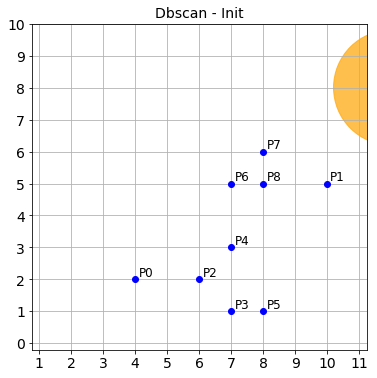

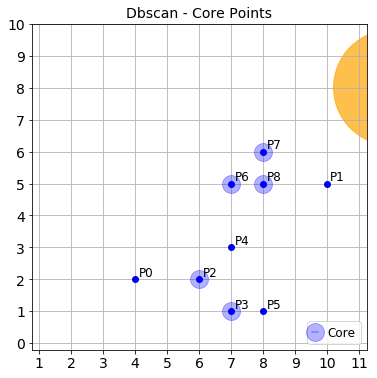

Core Points dict_keys([2, 3, 6, 7, 8])


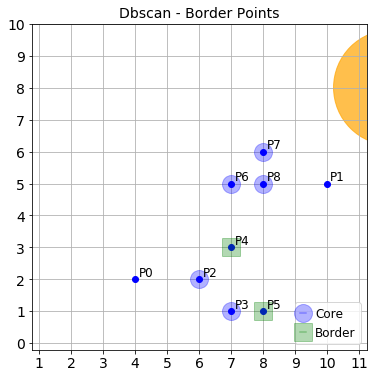

Border Points dict_keys([4, 5])


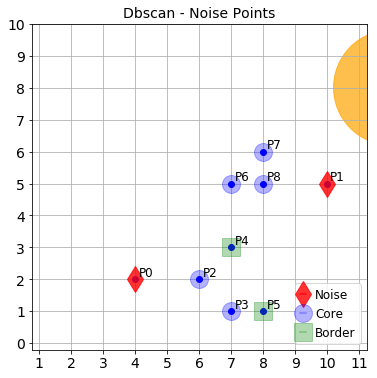

Noise Points dict_keys([0, 1])


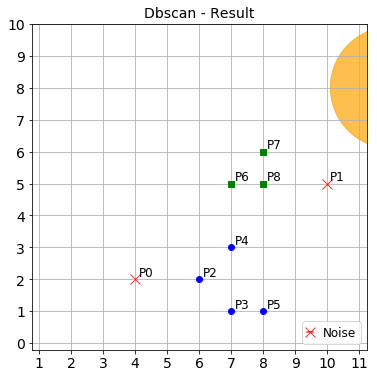

defaultdict(<class 'set'>, {0: {2, 3, 4, 5}, 1: {8, 6, 7}})


In [69]:
dbscan = ddm.DidatticDbscan(eps=1.8, min_pts=3)
dbscan.fit(dataset, step_by_step=False)

iter 0
distance merge 0.00
[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,)]
[[ 0.    4.24  4.47  2.83  4.12  3.    1.41  1.  ]
 [ 4.24  0.    1.41  1.41  2.24  3.    4.47  3.61]
 [ 4.47  1.41  0.    2.    1.    4.12  5.1   4.12]
 [ 2.83  1.41  2.    0.    2.24  2.24  3.16  2.24]
 [ 4.12  2.24  1.    2.24  0.    4.47  5.    4.  ]
 [ 3.    3.    4.12  2.24  4.47  0.    2.24  2.  ]
 [ 1.41  4.47  5.1   3.16  5.    2.24  0.    1.  ]
 [ 1.    3.61  4.12  2.24  4.    2.    1.    0.  ]]
defaultdict(<class 'list'>, {0: [7], 2: [4], 4: [2], 6: [7], 7: [0, 6]})



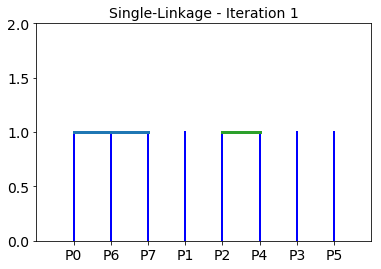

iter 1
distance merge 1.00
[(0, 6, 7), (1,), (2, 4), (3,), (5,)]
[[ 0.    3.61  4.    2.24  2.  ]
 [ 3.61  0.    1.41  1.41  3.  ]
 [ 4.    1.41  0.    2.    4.12]
 [ 2.24  1.41  2.    0.    2.24]
 [ 2.    3.    4.12  2.24  0.  ]]
defaultdict(<class 'list'>, {1: [2, 3], 2: [1], 3: [1]})



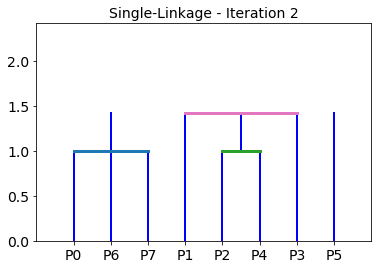

iter 2
distance merge 1.41
[((0, 6, 7),), ((1,), (2, 4), (3,)), ((5,),)]
[[ 0.    2.24  2.  ]
 [ 2.24  0.    2.24]
 [ 2.    2.24  0.  ]]
defaultdict(<class 'list'>, {0: [2], 2: [0]})



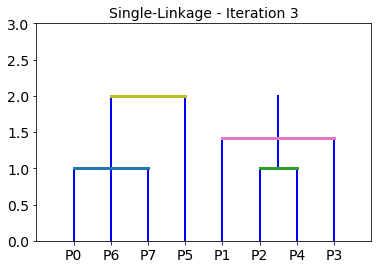

iter 3
distance merge 2.00
[(((0, 6, 7),), ((5,),)), (((1,), (2, 4), (3,)),)]
[[ 0.    2.24]
 [ 2.24  0.  ]]
defaultdict(<class 'list'>, {0: [1], 1: [0]})



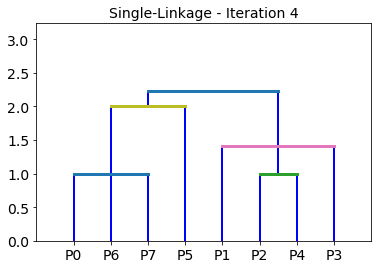

iter 4
distance merge 2.24
[((((0, 6, 7),), ((5,),)), (((1,), (2, 4), (3,)),))]
[[ 0.]]


In [53]:
hier = ddm.DidatticHierarchical()
hier.fit(dataset, link_criteria='min', use_distances=True, step_by_step=False)

In [ ]:
%matplotlib inline

import didactic_datamining as ddm

In [32]:
dataset = ddm.create_dataset(npoints=10, minvalue=0, maxvalue=10)
ddm.print_dataset(dataset)

P0 [4 1]
P1 [0 8]
P2 [6 7]
P3 [9 5]
P4 [7 7]
P5 [3 8]
P6 [7 9]
P7 [3 5]
P8 [8 7]
P9 [0 6]


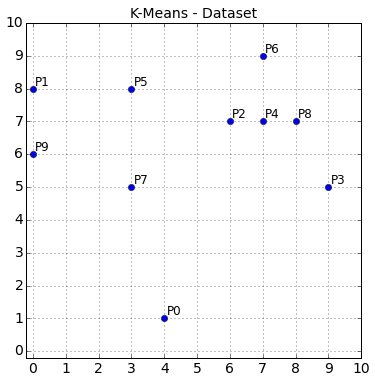

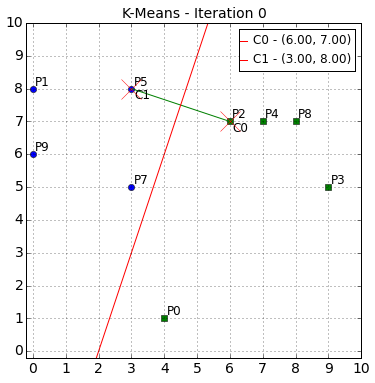

C0 (6.00, 7.00)
C1 (3.00, 8.00)


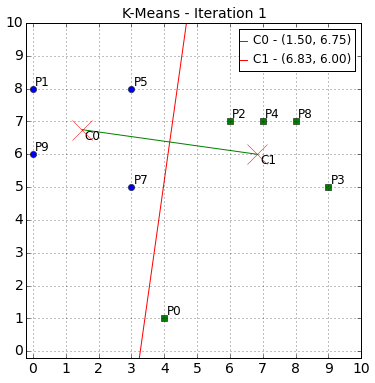

C0 (1.50, 6.75)
C1 (6.83, 6.00)


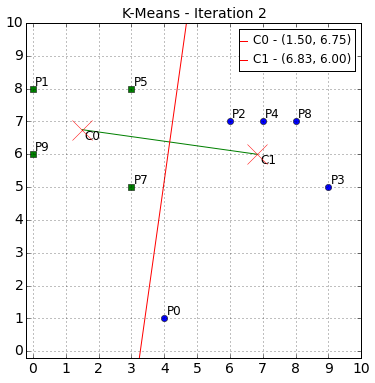

C0 (1.50, 6.75)
C1 (6.83, 6.00)


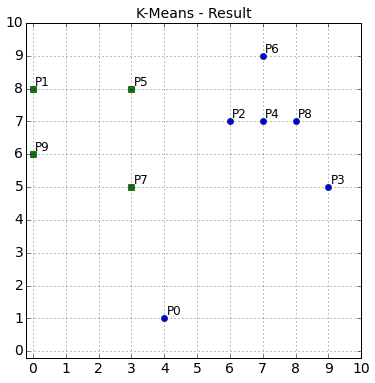

<didattic_kmeans.DidatticKMeans instance at 0x107f41a28>

In [33]:
kmeans = ddm.DidatticKMeans(K=2, centroid_indexs=(2, 5), dist=ddm.euclidean_distance)
kmeans.fit(dataset, step_by_step=False)

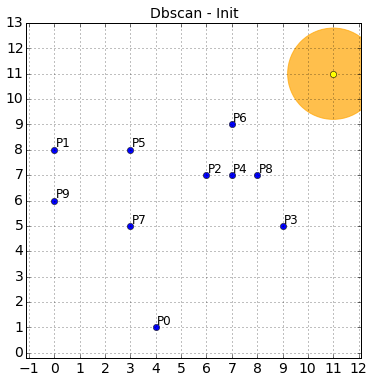

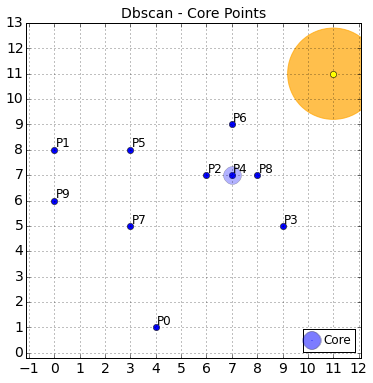

Core Points [4]


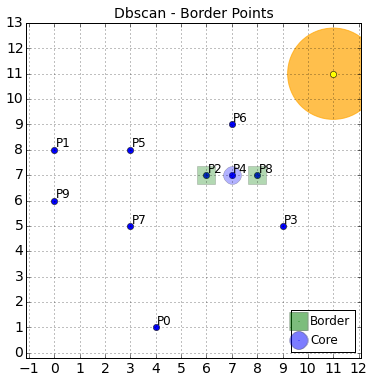

Border Points [8, 2]


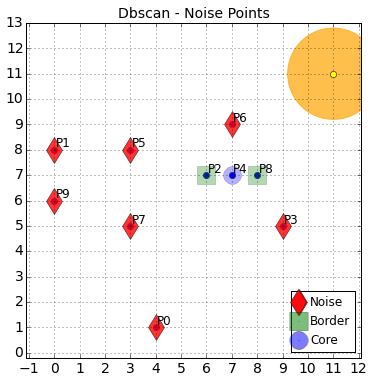

Noise Points [0, 1, 3, 5, 6, 7, 9]


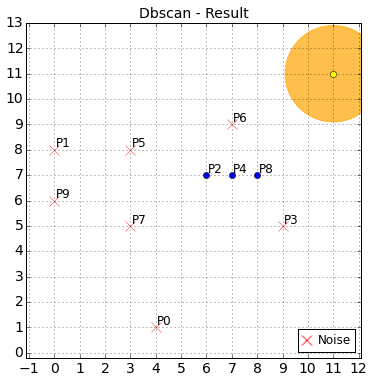

defaultdict(<type 'set'>, {0: set([8, 2, 4])})


In [34]:
dbscan = ddm.DidatticDbscan(eps=1.8, min_pts=3)
dbscan.fit(dataset, step_by_step=False)

iter 0
distance merge 0.00
[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]
[[ 0.    2.83  2.24  5.1   2.    6.71  2.    3.    5.    4.12]
 [ 2.83  0.    4.12  7.07  2.    6.4   2.    2.24  2.24  6.08]
 [ 2.24  4.12  0.    6.71  2.24  8.94  4.12  2.83  5.83  5.83]
 [ 5.1   7.07  6.71  0.    7.07  5.39  5.1   8.06  9.22  1.  ]
 [ 2.    2.    2.24  7.07  0.    7.81  2.83  1.    3.61  6.08]
 [ 6.71  6.4   8.94  5.39  7.81  0.    5.    8.49  7.62  5.1 ]
 [ 2.    2.    4.12  5.1   2.83  5.    0.    3.61  4.12  4.12]
 [ 3.    2.24  2.83  8.06  1.    8.49  3.61  0.    3.16  7.07]
 [ 5.    2.24  5.83  9.22  3.61  7.62  4.12  3.16  0.    8.25]
 [ 4.12  6.08  5.83  1.    6.08  5.1   4.12  7.07  8.25  0.  ]]
defaultdict(<class 'list'>, {3: [9], 4: [7], 7: [4], 9: [3]})



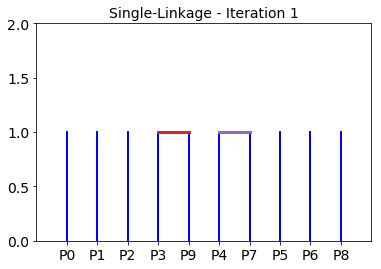

iter 1
distance merge 1.00
[(0,), (1,), (2,), (3, 9), (4, 7), (5,), (6,), (8,)]
[[ 0.    2.83  2.24  4.12  2.    6.71  2.    5.  ]
 [ 2.83  0.    4.12  6.08  2.    6.4   2.    2.24]
 [ 2.24  4.12  0.    5.83  2.24  8.94  4.12  5.83]
 [ 4.12  6.08  5.83  0.    6.08  5.1   4.12  8.25]
 [ 2.    2.    2.24  6.08  0.    7.81  2.83  3.16]
 [ 6.71  6.4   8.94  5.1   7.81  0.    5.    7.62]
 [ 2.    2.    4.12  4.12  2.83  5.    0.    4.12]
 [ 5.    2.24  5.83  8.25  3.16  7.62  4.12  0.  ]]
defaultdict(<class 'list'>, {0: [4, 6], 1: [4, 6], 4: [0, 1], 6: [0, 1]})



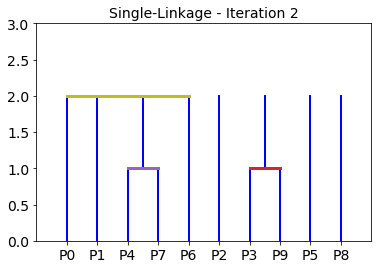

iter 2
distance merge 2.00
[((0,), (1,), (4, 7), (6,)), ((2,),), ((3, 9),), ((5,),), ((8,),)]
[[ 0.    2.24  4.12  5.    2.24]
 [ 2.24  0.    5.83  8.94  5.83]
 [ 4.12  5.83  0.    5.1   8.25]
 [ 5.    8.94  5.1   0.    7.62]
 [ 2.24  5.83  8.25  7.62  0.  ]]
defaultdict(<class 'list'>, {0: [1, 4], 1: [0], 4: [0]})



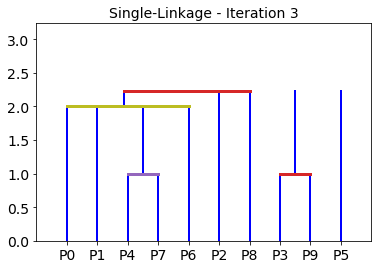

iter 3
distance merge 2.24
[(((0,), (1,), (4, 7), (6,)), ((2,),), ((8,),)), (((3, 9),),), (((5,),),)]
[[ 0.    4.12  5.  ]
 [ 4.12  0.    5.1 ]
 [ 5.    5.1   0.  ]]
defaultdict(<class 'list'>, {0: [1], 1: [0]})



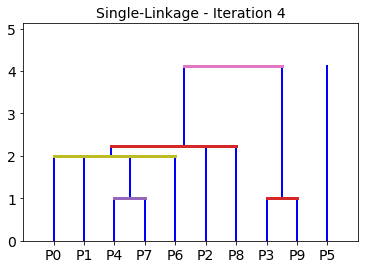

iter 4
distance merge 4.12
[((((0,), (1,), (4, 7), (6,)), ((2,),), ((8,),)), (((3, 9),),)), ((((5,),),),)]
[[ 0.  5.]
 [ 5.  0.]]
defaultdict(<class 'list'>, {0: [1], 1: [0]})



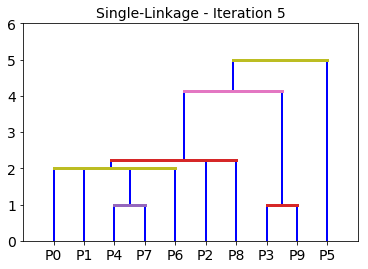

iter 5
distance merge 5.00
[(((((0,), (1,), (4, 7), (6,)), ((2,),), ((8,),)), (((3, 9),),)), ((((5,),),),))]
[[ 0.]]


In [5]:
hier = ddm.DidatticHierarchical()
hier.fit(dataset, link_criteria='min', use_distances=True, step_by_step=False)

In [70]:
transactions = ddm.create_transactional_dataset(num_transaction=10, num_items=6, min_len=2, max_len=4)
ddm.print_transactions(transactions)

['B', 'D', 'E']
['B', 'C', 'E']
['B', 'D']
['B', 'C', 'D', 'E']
['B', 'C', 'E', 'F']
['B', 'C', 'E']
['B', 'C', 'D', 'F']
['B', 'D']
['A', 'D']
['B', 'C']


In [71]:
apriori = ddm.DidatticApriori(min_sup=0.3, sup_type='r')
apriori.fit(transactions, step_by_step=False)

Apriori - Iteration 1
('A',) 0.10 X
('B',) 0.90 
('C',) 0.60 
('D',) 0.60 
('E',) 0.50 
('F',) 0.20 X
Apriori - Iteration 2
('B', 'C') 0.60 
('B', 'D') 0.50 
('B', 'E') 0.50 
('C', 'D') 0.20 X
('C', 'E') 0.40 
('D', 'E') 0.20 X
Apriori - Iteration 3
('B', 'C', 'E') 0.40 
Apriori - Iteration 4


In [72]:
apriori.extract_rules(min_conf=0.8)

('B',) --> ('C',) conf: 0.67 X 
('B',) --> ('C', 'E') conf: 0.44 X 
('B',) --> ('D',) conf: 0.56 X 
('B',) --> ('E',) conf: 0.56 X 
('B', 'C') --> ('E',) conf: 0.67 X 
('B', 'E') --> ('C',) conf: 0.80  lift: 1.33
('C',) --> ('B',) conf: 1.00  lift: 1.11
('C',) --> ('B', 'E') conf: 0.67 X 
('C',) --> ('E',) conf: 0.67 X 
('C', 'E') --> ('B',) conf: 1.00  lift: 1.11
('D',) --> ('B',) conf: 0.83  lift: 0.93
('E',) --> ('B',) conf: 1.00  lift: 1.11
('E',) --> ('B', 'C') conf: 0.80  lift: 1.33
('E',) --> ('C',) conf: 0.80  lift: 1.33


In [8]:
apriori.get_jdata()

{'data': [['C', 'D', 'E', 'F'],
  ['D', 'F'],
  ['B', 'F'],
  ['A', 'B'],
  ['B', 'D'],
  ['B', 'C', 'D', 'E'],
  ['C', 'E'],
  ['B', 'C', 'D'],
  ['A', 'C', 'D'],
  ['A', 'D', 'E', 'F']],
 'itemsets': [[[['A'], 0.3, ''],
   [['B'], 0.5, ''],
   [['C'], 0.5, ''],
   [['D'], 0.7, ''],
   [['E'], 0.4, ''],
   [['F'], 0.4, '']],
  [[['A', 'B'], 0.1, 'X'],
   [['A', 'C'], 0.1, 'X'],
   [['A', 'D'], 0.2, 'X'],
   [['A', 'E'], 0.1, 'X'],
   [['A', 'F'], 0.1, 'X'],
   [['B', 'C'], 0.2, 'X'],
   [['B', 'D'], 0.3, ''],
   [['B', 'E'], 0.1, 'X'],
   [['B', 'F'], 0.1, 'X'],
   [['C', 'D'], 0.4, ''],
   [['C', 'E'], 0.3, ''],
   [['C', 'F'], 0.1, 'X'],
   [['D', 'E'], 0.3, ''],
   [['D', 'F'], 0.3, ''],
   [['E', 'F'], 0.2, 'X']],
  [[['C', 'D', 'E'], 0.2, 'X']]],
 'rules': [[['B'], ['D'], 0.6, 'X', None],
  [['C'], ['D'], 0.8, '', 1.142857142857143],
  [['C'], ['E'], 0.6, 'X', None],
  [['D'], ['B'], 0.42857142857142855, 'X', None],
  [['D'], ['C'], 0.5714285714285714, 'X', None],
  [['D'], ['E']

In [81]:
import pandas as pd

train = pd.read_csv('train.csv', skipinitialspace=True, delimiter=',')
test = pd.read_csv('test.csv', skipinitialspace=True, delimiter=',')

In [82]:
train

,Contract,Sex,Minutes,Churn
0,Classic,F,50,YES
1,Travel,M,60,NO
2,Travel,M,70,YES
3,Young,F,80,NO
4,Travel,F,90,NO
5,Classic,M,100,YES
6,Classic,M,110,YES
7,Young,F,50,YES
8,Young,M,150,NO
9,Travel,F,100,NO


In [83]:
test

,Contract,Sex,Minutes,Churn
0,Classic,F,30,YES
1,Travel,M,60,NO
2,Travel,F,100,NO
3,Travel,M,100,YES


Root
Parent
	1 - 5.0/10 = 5.0/10
Contract ['Classic', 'Travel', 'Young']
	 Classic 3
		YES, 3/3
	,	1 - 3.0/3 = 0.0/3
	 Travel 4
		NO, 3/4
		YES, 1/4
	,	1 - 3/4 = 1/4
	 Young 3
		NO, 2/3
		YES, 1/3
	,	1 - 2/3 = 1/3
	 (0.0/3 * 3/10) + (1/4 * 4.0/10) + (1/3 * 3/10) = 2.0/10
Contract# ['Travel-Classic', 'Young']
	 Travel-Classic 7
		NO, 3/7
		YES, 4/7
	,	1 - 4/7 = 3/7
	 Young 3
		NO, 2/3
		YES, 1/3
	,	1 - 2/3 = 1/3
	 (3/7 * 7/10) + (1/3 * 3/10) = 4.0/10
	Delta Gain: 5.0/10 - 4.0/10 = 1/10

Contract# ['Travel', 'Young-Classic']
	 Travel 4
		NO, 3/4
		YES, 1/4
	,	1 - 3/4 = 1/4
	 Young-Classic 6
		NO, 2/6
		YES, 4/6
	,	1 - 4.0/6 = 2.0/6
	 (1/4 * 4.0/10) + (2.0/6 * 6.0/10) = 3/10
	Delta Gain: 5.0/10 - 3/10 = 2.0/10

Contract# ['Classic', 'Young-Travel']
	 Classic 3
		YES, 3/3
	,	1 - 3.0/3 = 0.0/3
	 Young-Travel 7
		NO, 5/7
		YES, 2/7
	,	1 - 5/7 = 2/7
	 (0.0/3 * 3/10) + (2/7 * 7/10) = 2.0/10
	Delta Gain: 5.0/10 - 2.0/10 = 3/10

Sex ['F', 'M']
	 F 5
		NO, 3/5
		YES, 2/5
	,	1 - 3/5 = 2/5
	 M 5
		

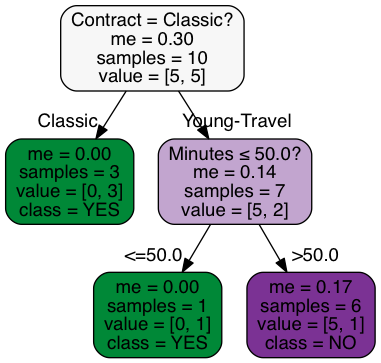

In [77]:
tree = ddm.DidatticClassificationTree(fun=ddm.error_rate, fun_name='me', 
                                      min_samples_split=2, min_samples_leaf=1, step_by_step=False)
tree.fit(train, target='Churn')

In [45]:
test['Predicted'] = tree.predict(test)

tree.evaluate(test)

R\P	|NO	|YES	|
NO	|2	|0	|
YES	|0	|2	|
Precision 1 1.0
Recall 1 1.0
F1-measure 1 1.0
Accuracy 1 1.0


In [8]:
from sklearn.metrics import classification_report

In [10]:
print(classification_report([0,0,0,1,1,0,1,1],[0,0,0,1,1,1,0,0]))

             precision    recall  f1-score   support

          0       0.60      0.75      0.67         4
          1       0.67      0.50      0.57         4

avg / total       0.63      0.62      0.62         8



In [11]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score([0,0,0,1,1,0,1,1],[0,0,0,1,1,1,0,0])

0.625